In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv('./data/revenue_distribution_by_sector.csv')
d1 = df["entity_id"].describe()
d2 = df["nace_level_1_code"].describe()
d3 = df["nace_level_1_name"].describe()
d4 = df["nace_level_2_code"].describe()
d5 = df["nace_level_2_name"].describe()
d6 = df["revenue_pct"].describe()
display(d1)
display(d2)
display(d3)
display(d4)
display(d5)
display(d6)
print(df["entity_id"].nunique())

count      799.000000
mean      3022.657071
std       2451.801339
min         29.000000
25%       1477.000000
50%       2349.000000
75%       3559.500000
max      10801.000000
Name: entity_id, dtype: float64

count     799
unique     20
top         C
freq      303
Name: nace_level_1_code, dtype: object

count               799
unique               20
top       Manufacturing
freq                303
Name: nace_level_1_name, dtype: object

count    799.000000
mean      46.420526
std       23.144493
min        1.000000
25%       26.000000
50%       47.000000
75%       63.000000
max       97.000000
Name: nace_level_2_code, dtype: float64

count                       799
unique                       79
top       Publishing activities
freq                         48
Name: nace_level_2_name, dtype: object

count    799.000000
mean       0.598248
std        0.373331
min        0.000264
25%        0.224817
50%        0.571697
75%        1.000000
max        1.000000
Name: revenue_pct, dtype: float64

478


<Figure size 1800x800 with 0 Axes>

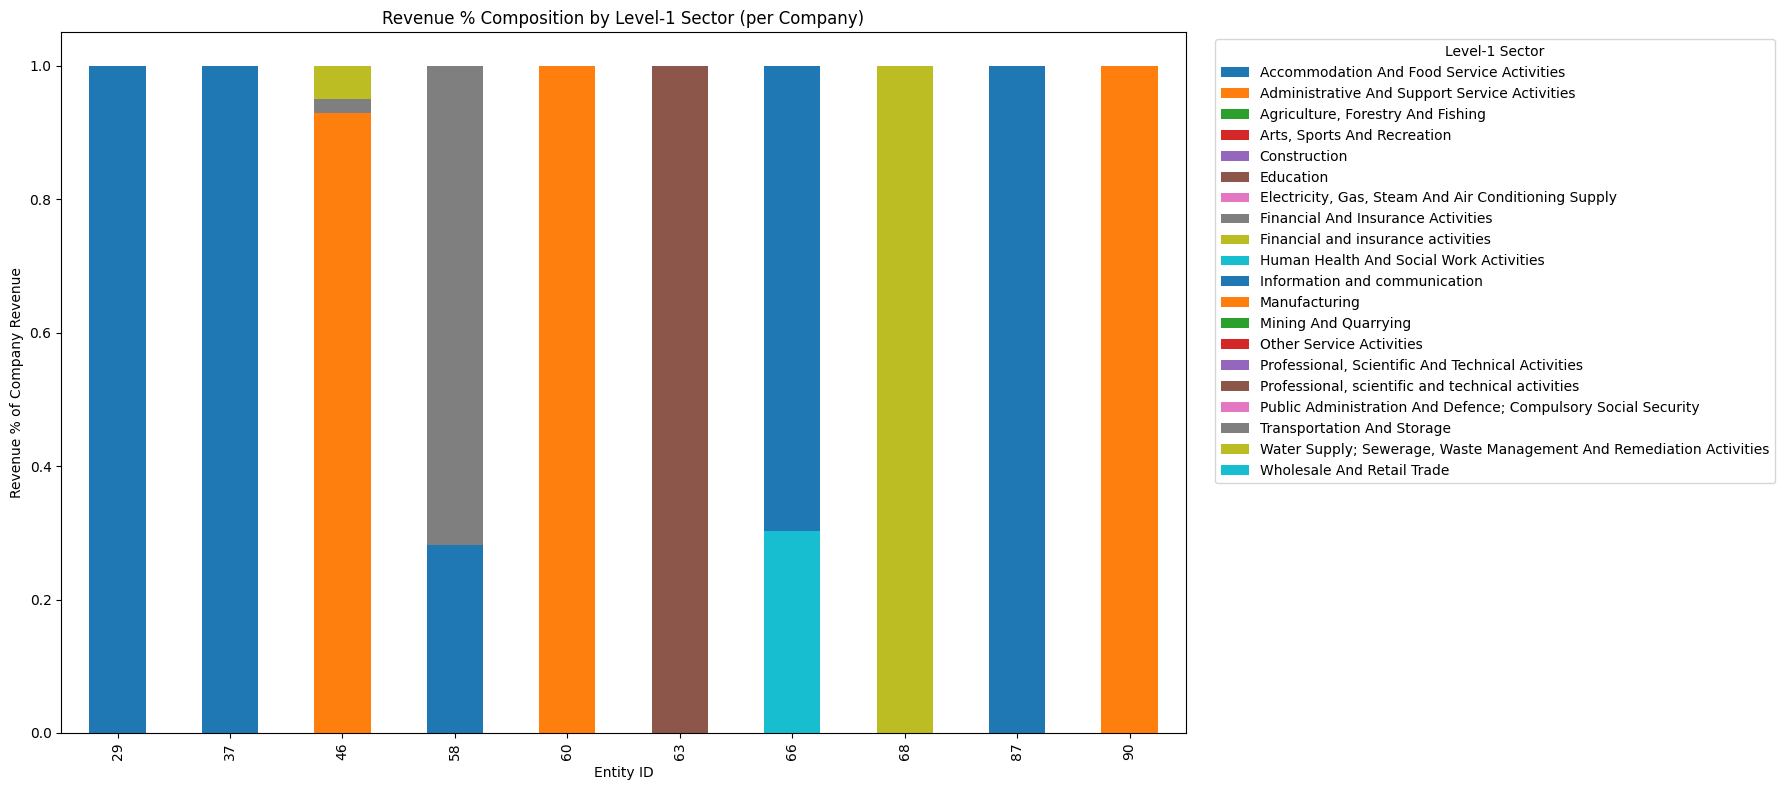

In [169]:
rev_by_entity_lvl1 = (
    df
    .groupby(["entity_id", "nace_level_1_name"])["revenue_pct"]
    .sum()
    .reset_index()
)
entity_lvl1_matrix = rev_by_entity_lvl1.pivot(
    index="entity_id",
    columns="nace_level_1_name",
    values="revenue_pct"
).fillna(0)
row_sums = entity_lvl1_matrix.sum(axis=1)
top_entities = entity_lvl1_matrix.head(10)

plt.figure(figsize=(18, 8))
top_entities.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 8)
)

plt.title("Revenue % Composition by Level-1 Sector (per Company)")
plt.xlabel("Entity ID")
plt.ylabel("Revenue % of Company Revenue")
plt.legend(title="Level-1 Sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





/var/folders/tm/nhkjnn497ns96d08fh2zd95w0000gn/T/ipykernel_27075/1709928268.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(6, "revenue_pct"))


<Figure size 1600x1000 with 0 Axes>

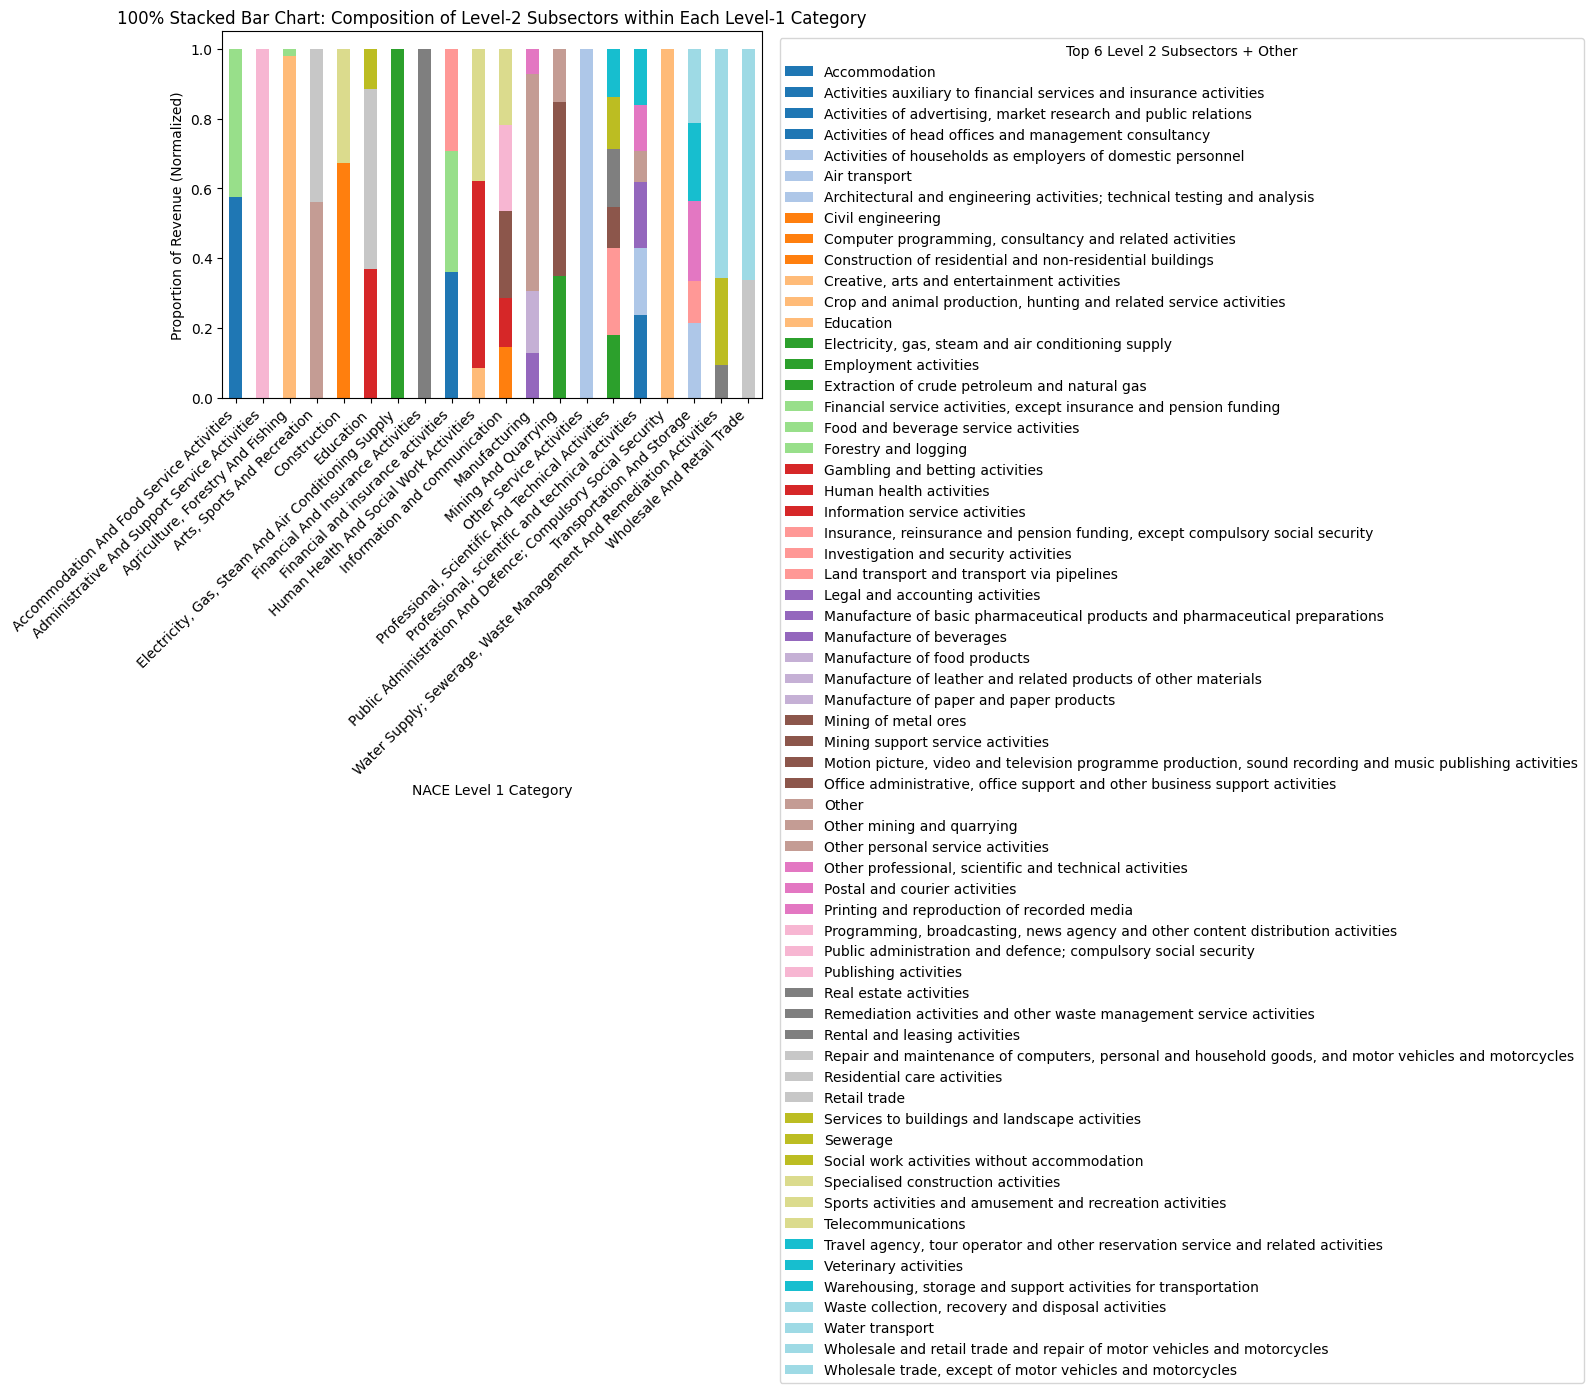

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

g = (
    df.groupby(["nace_level_1_name", "nace_level_2_name"])["revenue_pct"]
      .mean()
      .reset_index()
)
top5 = (
    g.groupby("nace_level_1_name", group_keys=False)
     .apply(lambda x: x.nlargest(6, "revenue_pct"))
)
other = (
    g.merge(top5, how="outer", indicator=True)
     .query("_merge == 'left_only'")
     .drop(columns=["_merge"])
)

other_grouped = (
    other.groupby("nace_level_1_name")["revenue_pct"]
         .sum()
         .reset_index()
)
other_grouped["nace_level_2_name"] = "Other"
final = pd.concat([top5, other_grouped], ignore_index=True)

pivot = final.pivot(
    index="nace_level_1_name",
    columns="nace_level_2_name",
    values="revenue_pct"
).fillna(0)

pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)
plt.figure(figsize=(16, 10))
pivot_norm.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 10),
    colormap="tab20"
)

plt.title("100% Stacked Bar Chart: Composition of Level-2 Subsectors within Each Level-1 Category")
plt.ylabel("Proportion of Revenue (Normalized)")
plt.xlabel("NACE Level 1 Category")
plt.legend(title="Top 6 Level 2 Subsectors + Other", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


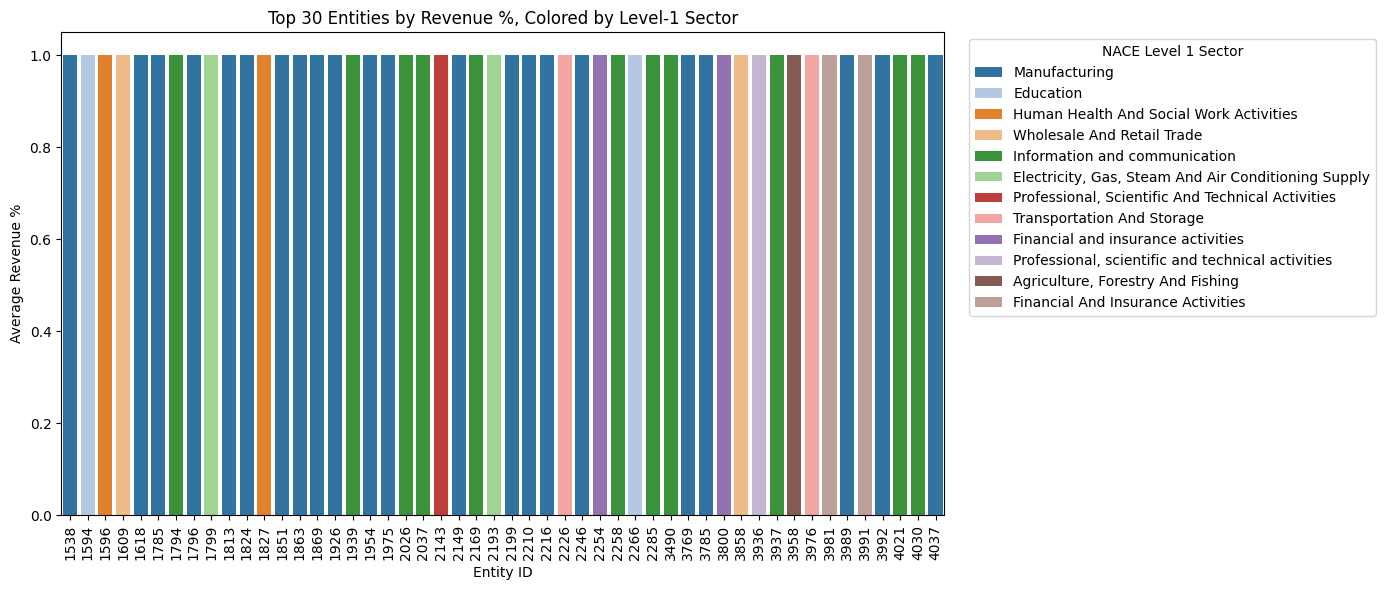

In [144]:
avg_rev = (
    df.groupby(["entity_id", "nace_level_1_name"])["revenue_pct"]
      .mean()
      .reset_index()
      .sort_values("revenue_pct", ascending=False)
      .head(50)   
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=avg_rev,
    x="entity_id",
    y="revenue_pct",
    hue="nace_level_1_name",  
    palette="tab20"
)

plt.xticks(rotation=90)
plt.title("Top 30 Entities by Revenue %, Colored by Level-1 Sector")
plt.xlabel("Entity ID")
plt.ylabel("Average Revenue %")
plt.legend(title="NACE Level 1 Sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

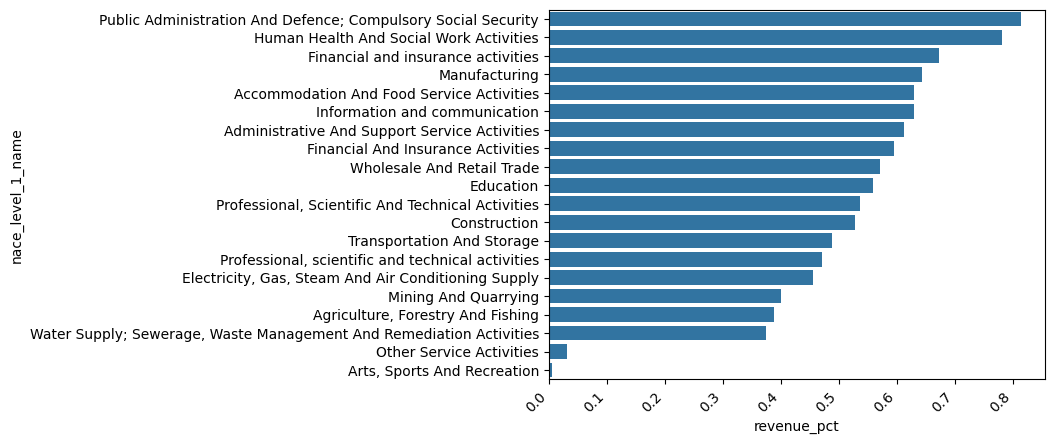

In [110]:
avg_rev = (df.groupby("nace_level_1_name")["revenue_pct"].mean().reset_index().sort_values("revenue_pct", ascending=False))

sns.barplot(data=avg_rev, x="revenue_pct", y="nace_level_1_name")
plt.xticks(rotation=45, ha='right')

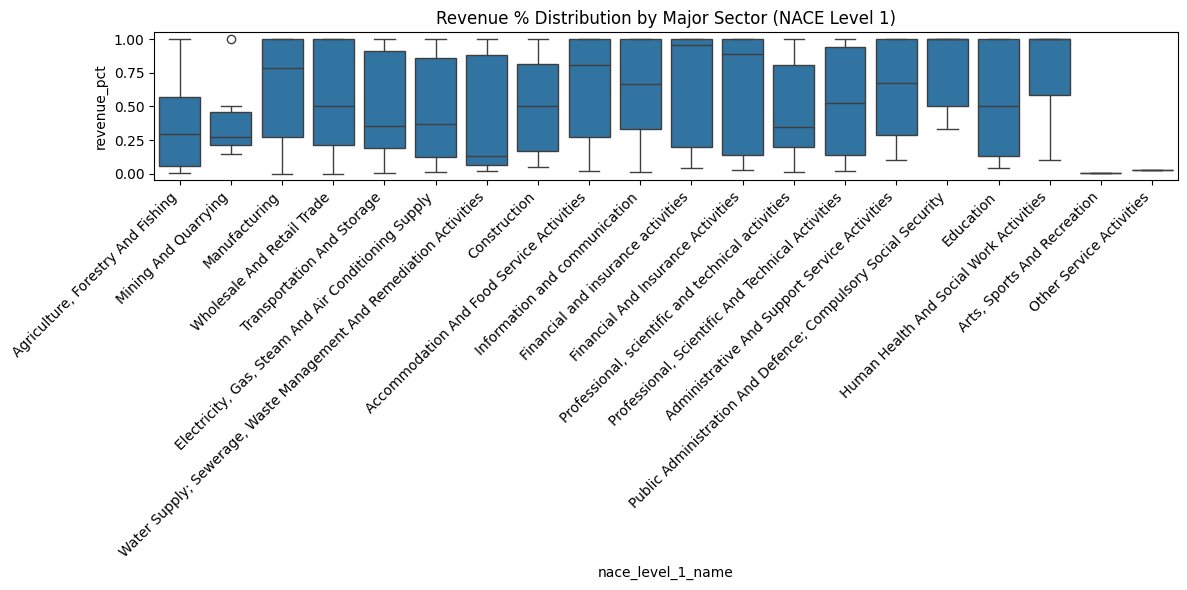

In [111]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="nace_level_1_name", y="revenue_pct")
plt.xticks(rotation=45, ha='right')
plt.title("Revenue % Distribution by Major Sector (NACE Level 1)")
plt.tight_layout()
plt.show()

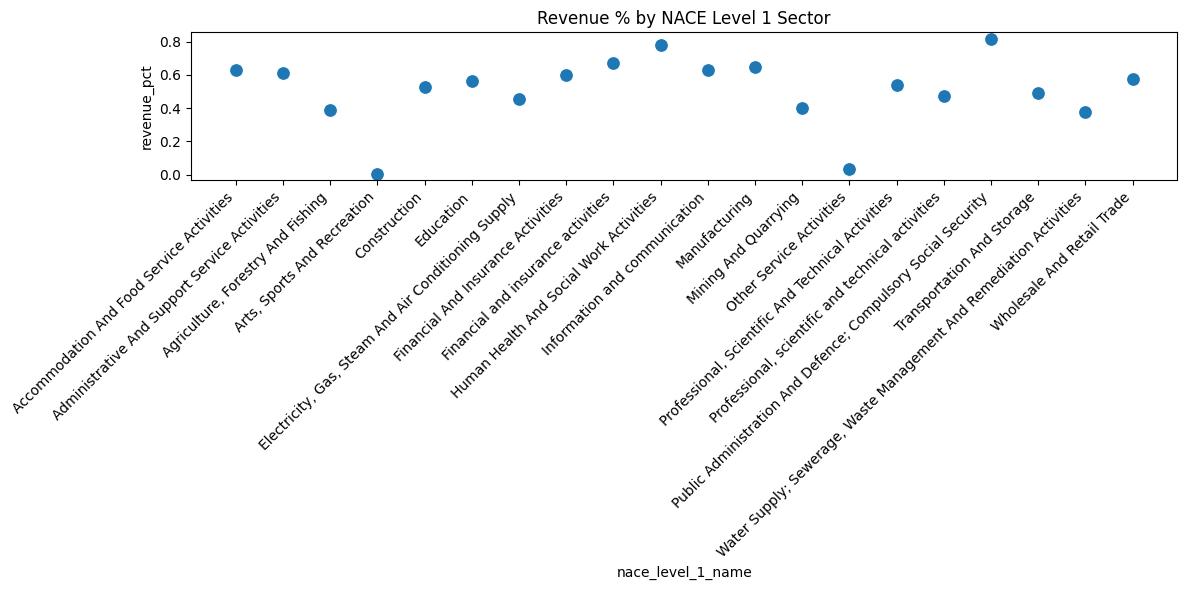

In [108]:
avg_rev5 = (df.groupby("nace_level_1_name")["revenue_pct"].mean().reset_index())
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=avg_rev5,
    x="nace_level_1_name",
    y="revenue_pct",
    s=100
)
plt.xticks(rotation=45, ha="right")
plt.title("Revenue % by NACE Level 1 Sector")
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x12436eba0>,
 [Text(-0.001668023822673771, 1.0999987353158762, 'Arts, Sports And Recreation'),
  Text(-0.013877059858941984, 1.0999124634304638, 'Other Service Activities'),
  Text(-0.15100554992171003, 1.0895858497121014, 'Water Supply; Sewerage, Waste Management And Remediation Activities'),
  Text(-0.4009443702161231, 1.0243259305474974, 'Agriculture, Forestry And Fishing'),
  Text(-0.6359061686732356, 0.897565231414033, 'Mining And Quarrying'),
  Text(-0.8480886097173509, 0.7005324475480713, 'Electricity, Gas, Steam And Air Conditioning Supply'),
  Text(-1.0110764342403922, 0.4332717901314765, 'Professional, scientific and technical activities'),
  Text(-1.0934602862032896, 0.11976895464276249, 'Transportation And Storage'),
  Text(-1.077067767185491, -0.22343908541269505, 'Construction'),
  Text(-0.947654052540742, -0.5585264512116761, 'Professional, Scientific And Technical Activities'),
  Text(-0.7091510545272868, -0.8408952264478836, 'Education')

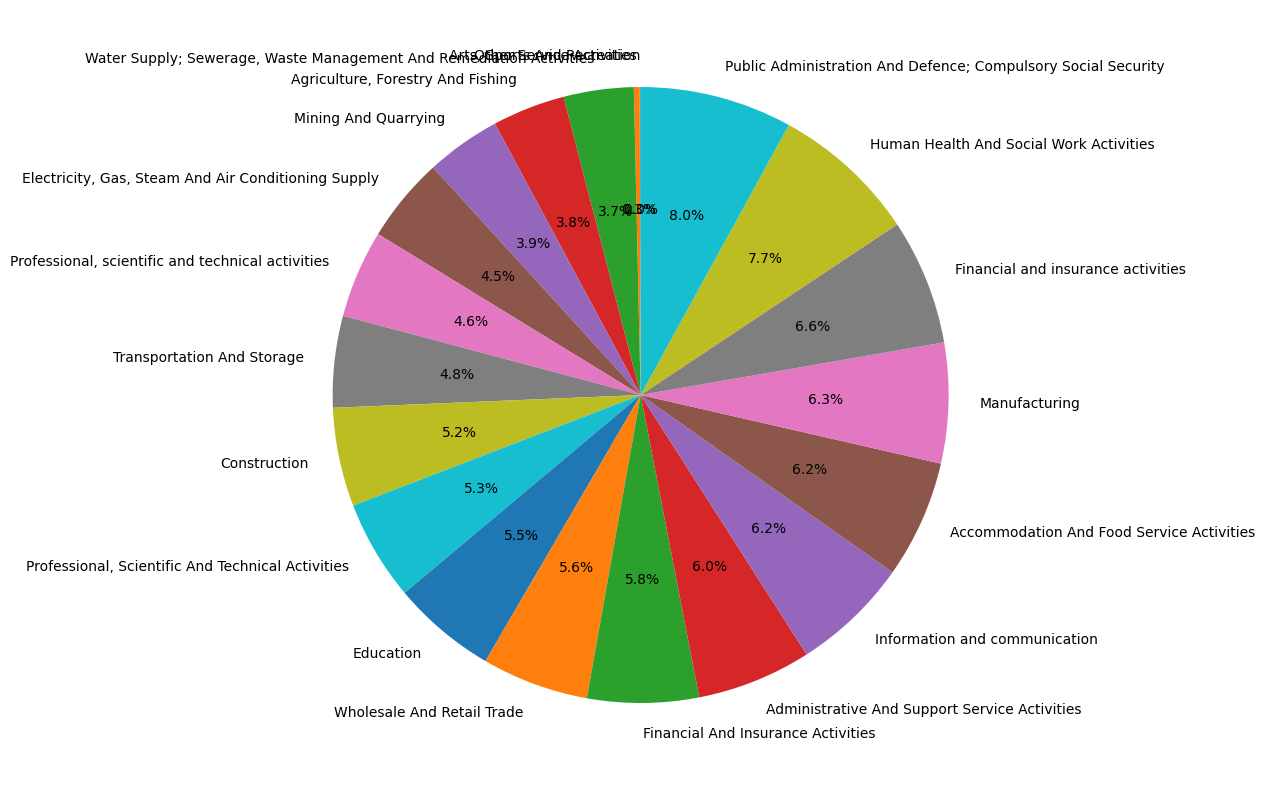

In [80]:
plt.figure(figsize=(10, 10))
plt.pie(
    avg_rev["revenue_pct"],
    labels=avg_rev["nace_level_1_name"],
    autopct="%1.1f%%",
    startangle=90
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Printing and reproduction of recorded media'),
  Text(1, 0, 'Manufacture of beverages'),
  Text(2, 0, 'Gambling and betting activities'),
  Text(3, 0, 'Motion picture, video and television programme production, sound recording and music publishing activities'),
  Text(4, 0, 'Residential care activities'),
  Text(5, 0, 'Manufacture of leather and related products of other materials'),
  Text(6, 0, 'Investigation and security activities'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Manufacture of food products'),
  Text(9, 0, 'Telecommunications'),
  Text(10, 0, 'Manufacture of basic pharmaceutical products and pharmaceutical preparations'),
  Text(11, 0, 'Manufacture of paper and paper products'),
  Text(12, 0, 'Manufacture of motor vehicles, trailers and semi-trailers'),
  Text(13, 0, 'Activities auxiliary to financial services and insurance activities'),
  Text(14, 0, 'Manufacture of chemicals and chemical products')])

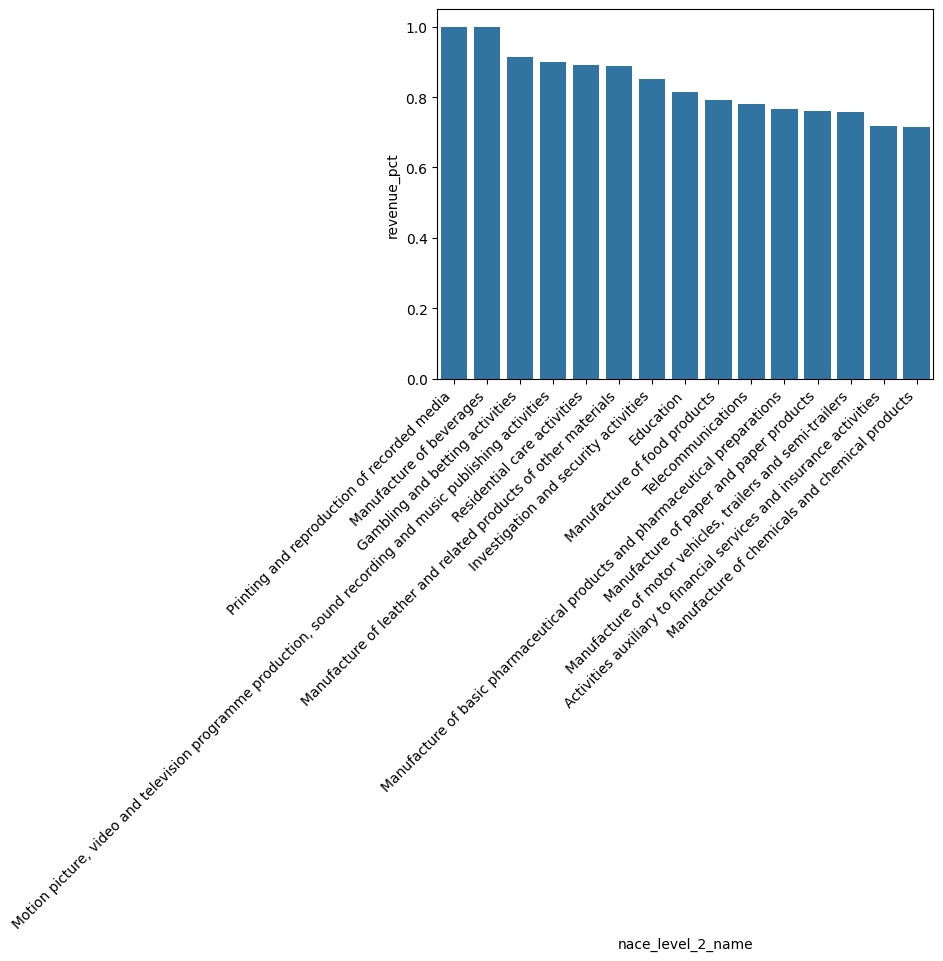

In [78]:
# nace_level_2 insights - top 15
avg_rev2 = (df.groupby("nace_level_2_name")["revenue_pct"].mean().reset_index().sort_values("revenue_pct", ascending=False))
avg_rev2 = avg_rev2.head(15)

sns.barplot(avg_rev2, x="nace_level_2_name", y="revenue_pct")
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Repair and maintenance of computers, personal and household goods, and motor vehicles and motorcycles'),
  Text(1, 0, 'Other personal service activities'),
  Text(2, 0, 'Forestry and logging'),
  Text(3, 0, 'Activities of households as employers of domestic personnel'),
  Text(4, 0, 'Remediation activities and other waste management service activities'),
  Text(5, 0, 'Manufacture of textiles'),
  Text(6, 0, 'Creative, arts and entertainment activities'),
  Text(7, 0, 'Sewerage'),
  Text(8, 0, 'Social work activities without accommodation'),
  Text(9, 0, 'Mining of metal ores'),
  Text(10, 0, 'Other mining and quarrying'),
  Text(11, 0, 'Programming, broadcasting, news agency and other content distribution activities'),
  Text(12, 0, 'Manufacture of basic metals'),
  Text(13, 0, 'Land transport and transport via pipelines'),
  Text(14, 0, 'Scientific research and development')])

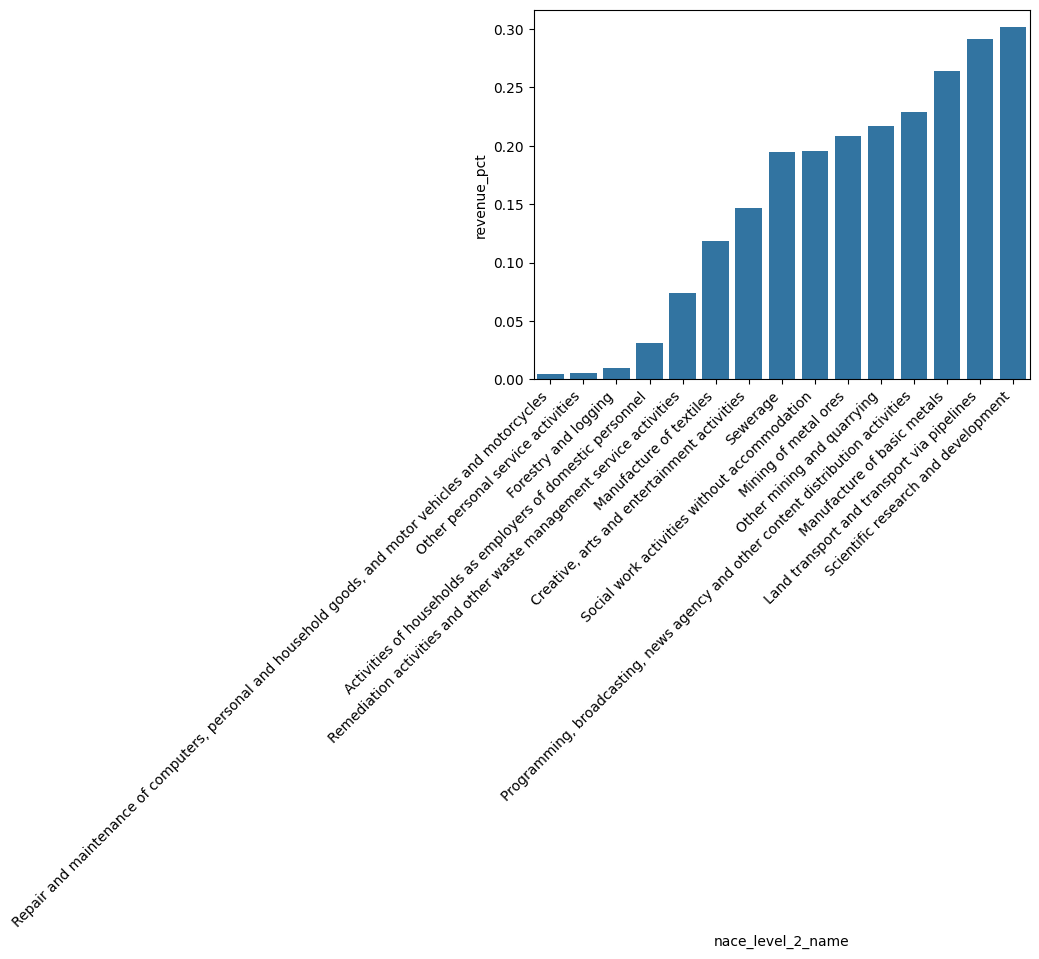

In [60]:
# bottom 15
avg_rev3 = (df.groupby("nace_level_2_name")["revenue_pct"].mean().reset_index().sort_values("revenue_pct", ascending=True))
avg_rev3 = avg_rev2.head(15)

sns.barplot(avg_rev3, x="nace_level_2_name", y="revenue_pct")
plt.xticks(rotation=45, ha='right')

In [101]:
avg_rev_L2 = df.groupby("nace_level_2_name")["revenue_pct"].mean().reset_index()

<Axes: xlabel='nace_level_2_name', ylabel='revenue_pct'>

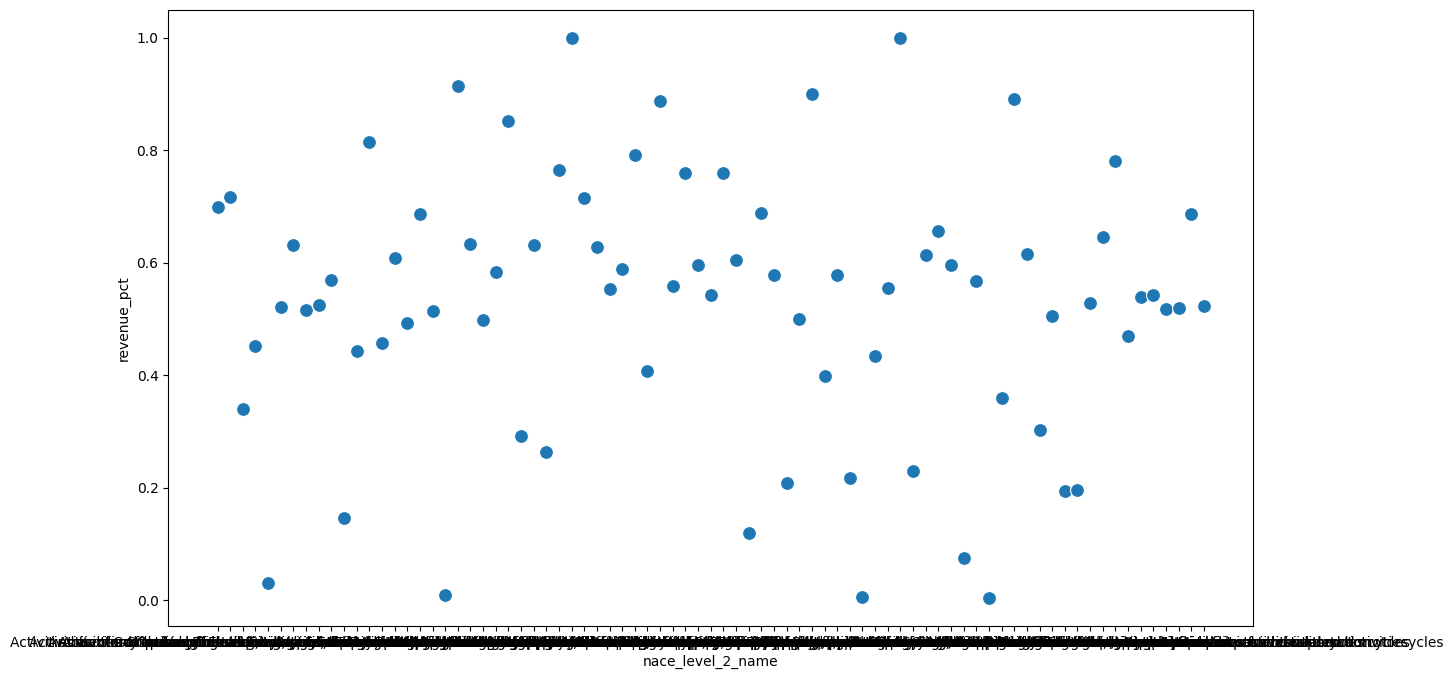

In [102]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=avg_rev_L2,
    x="nace_level_2_name",
    y="revenue_pct",
    s=100
)

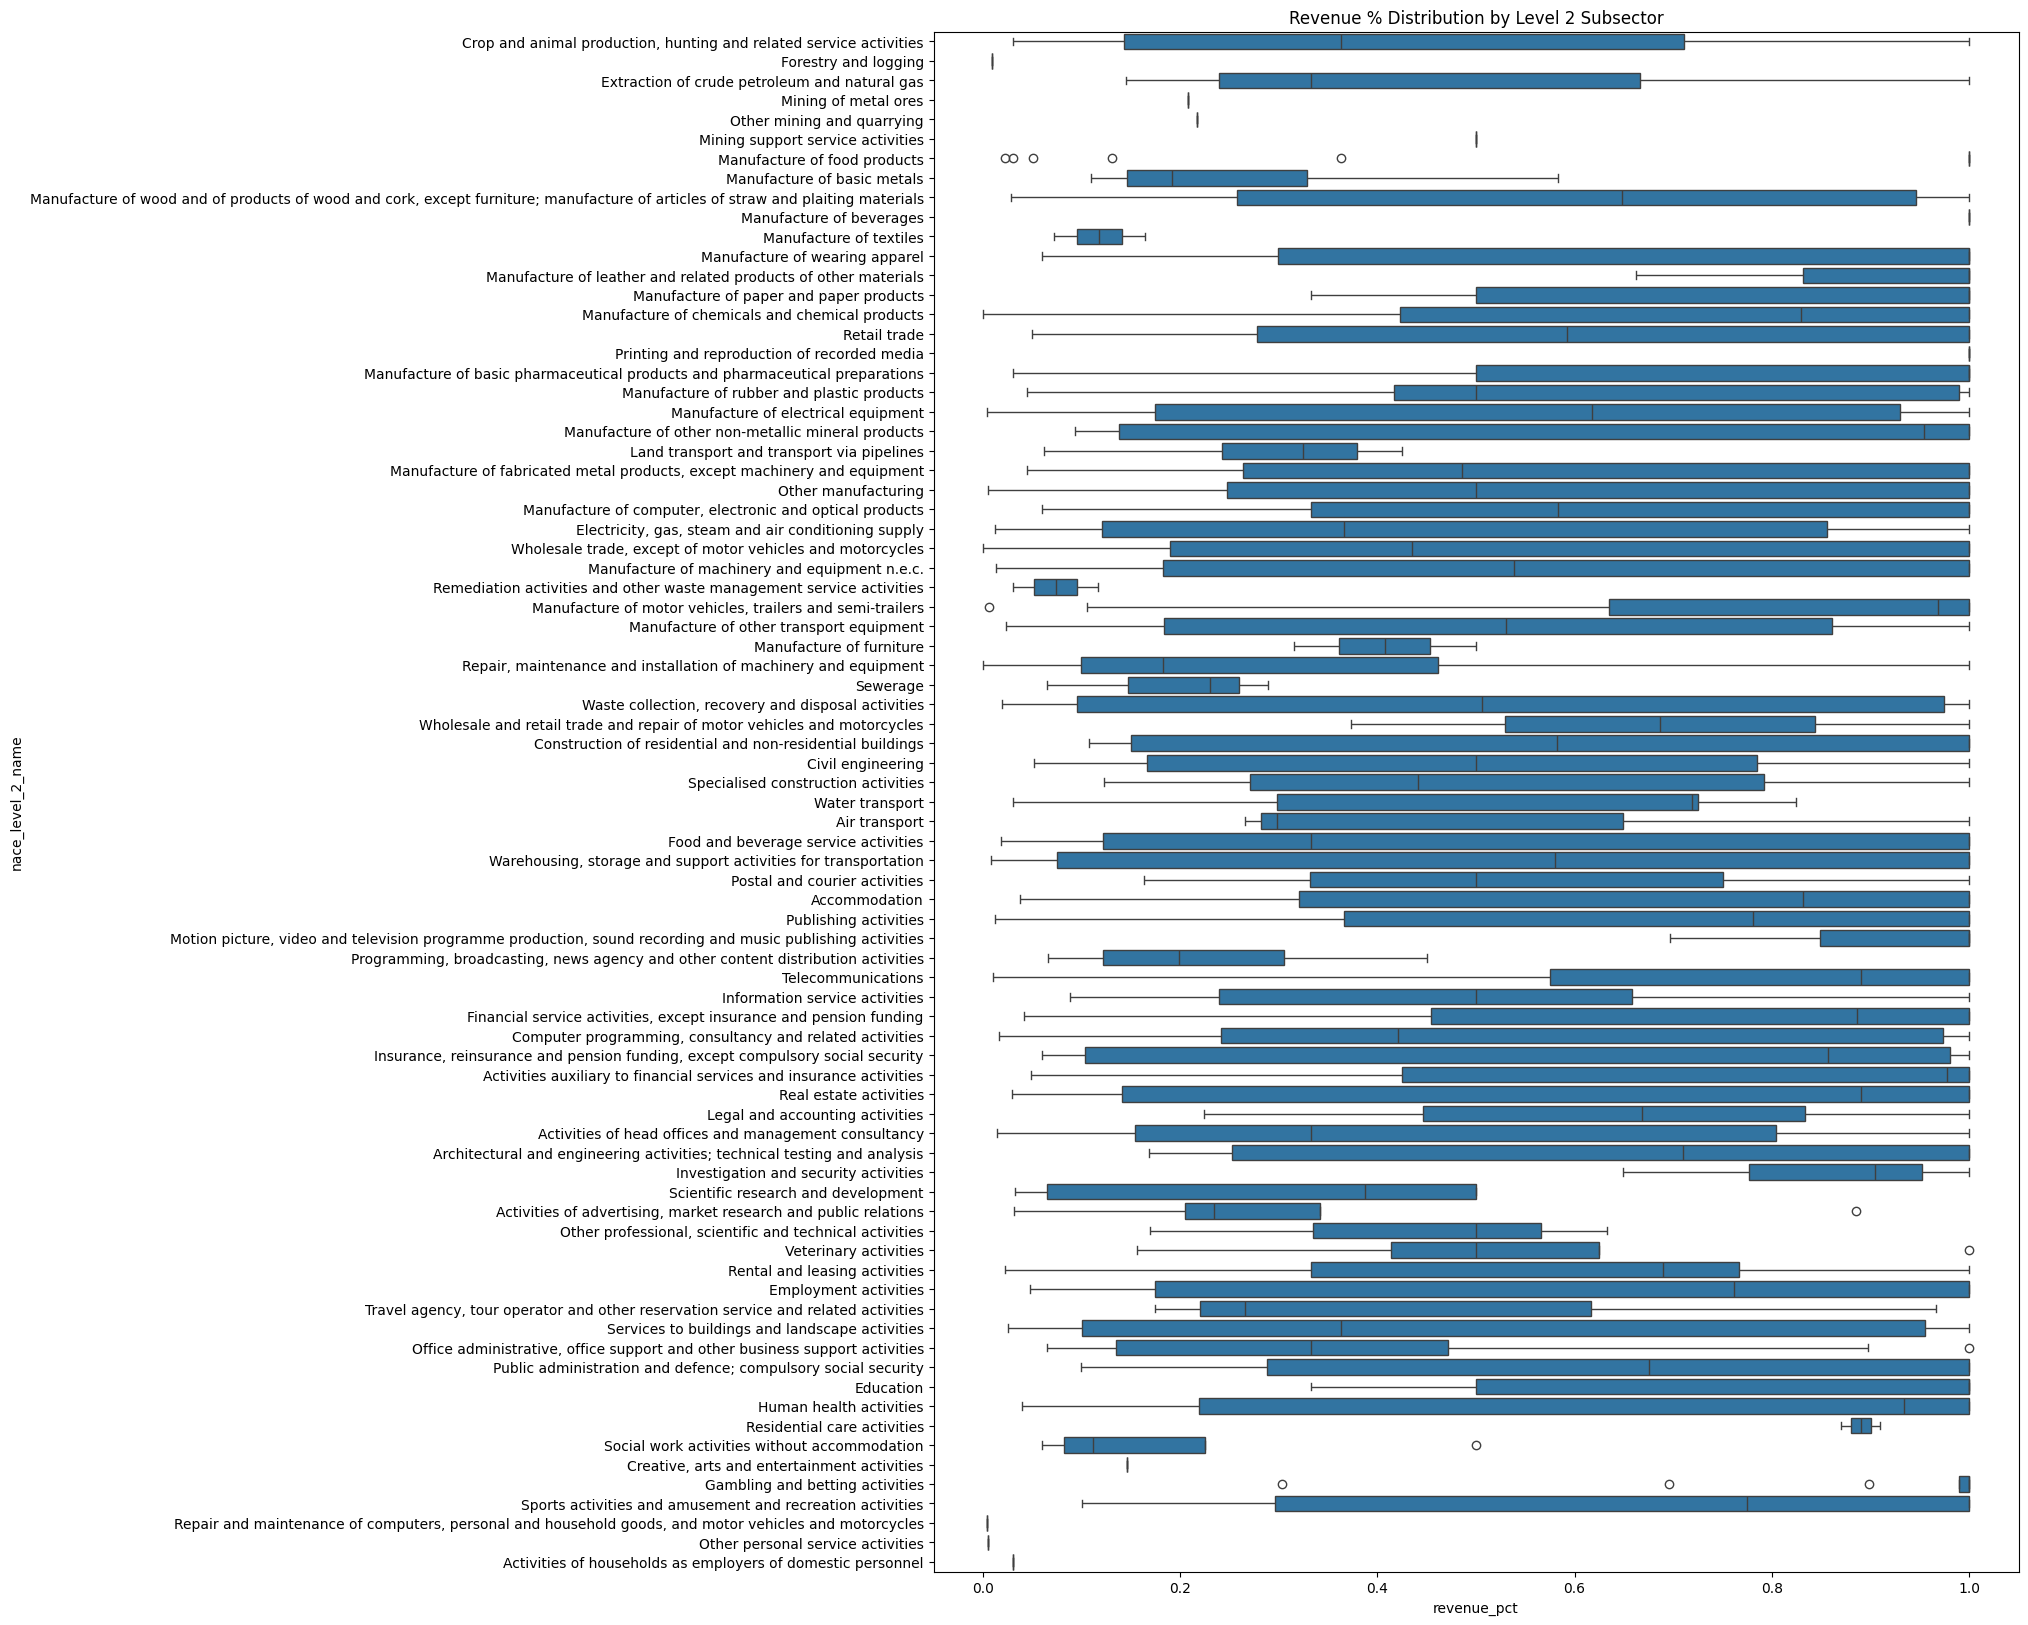

In [92]:
plt.figure(figsize=(14, 20))
sns.boxplot(data=df, y="nace_level_2_name", x="revenue_pct")
plt.title("Revenue % Distribution by Level 2 Subsector")
plt.show()

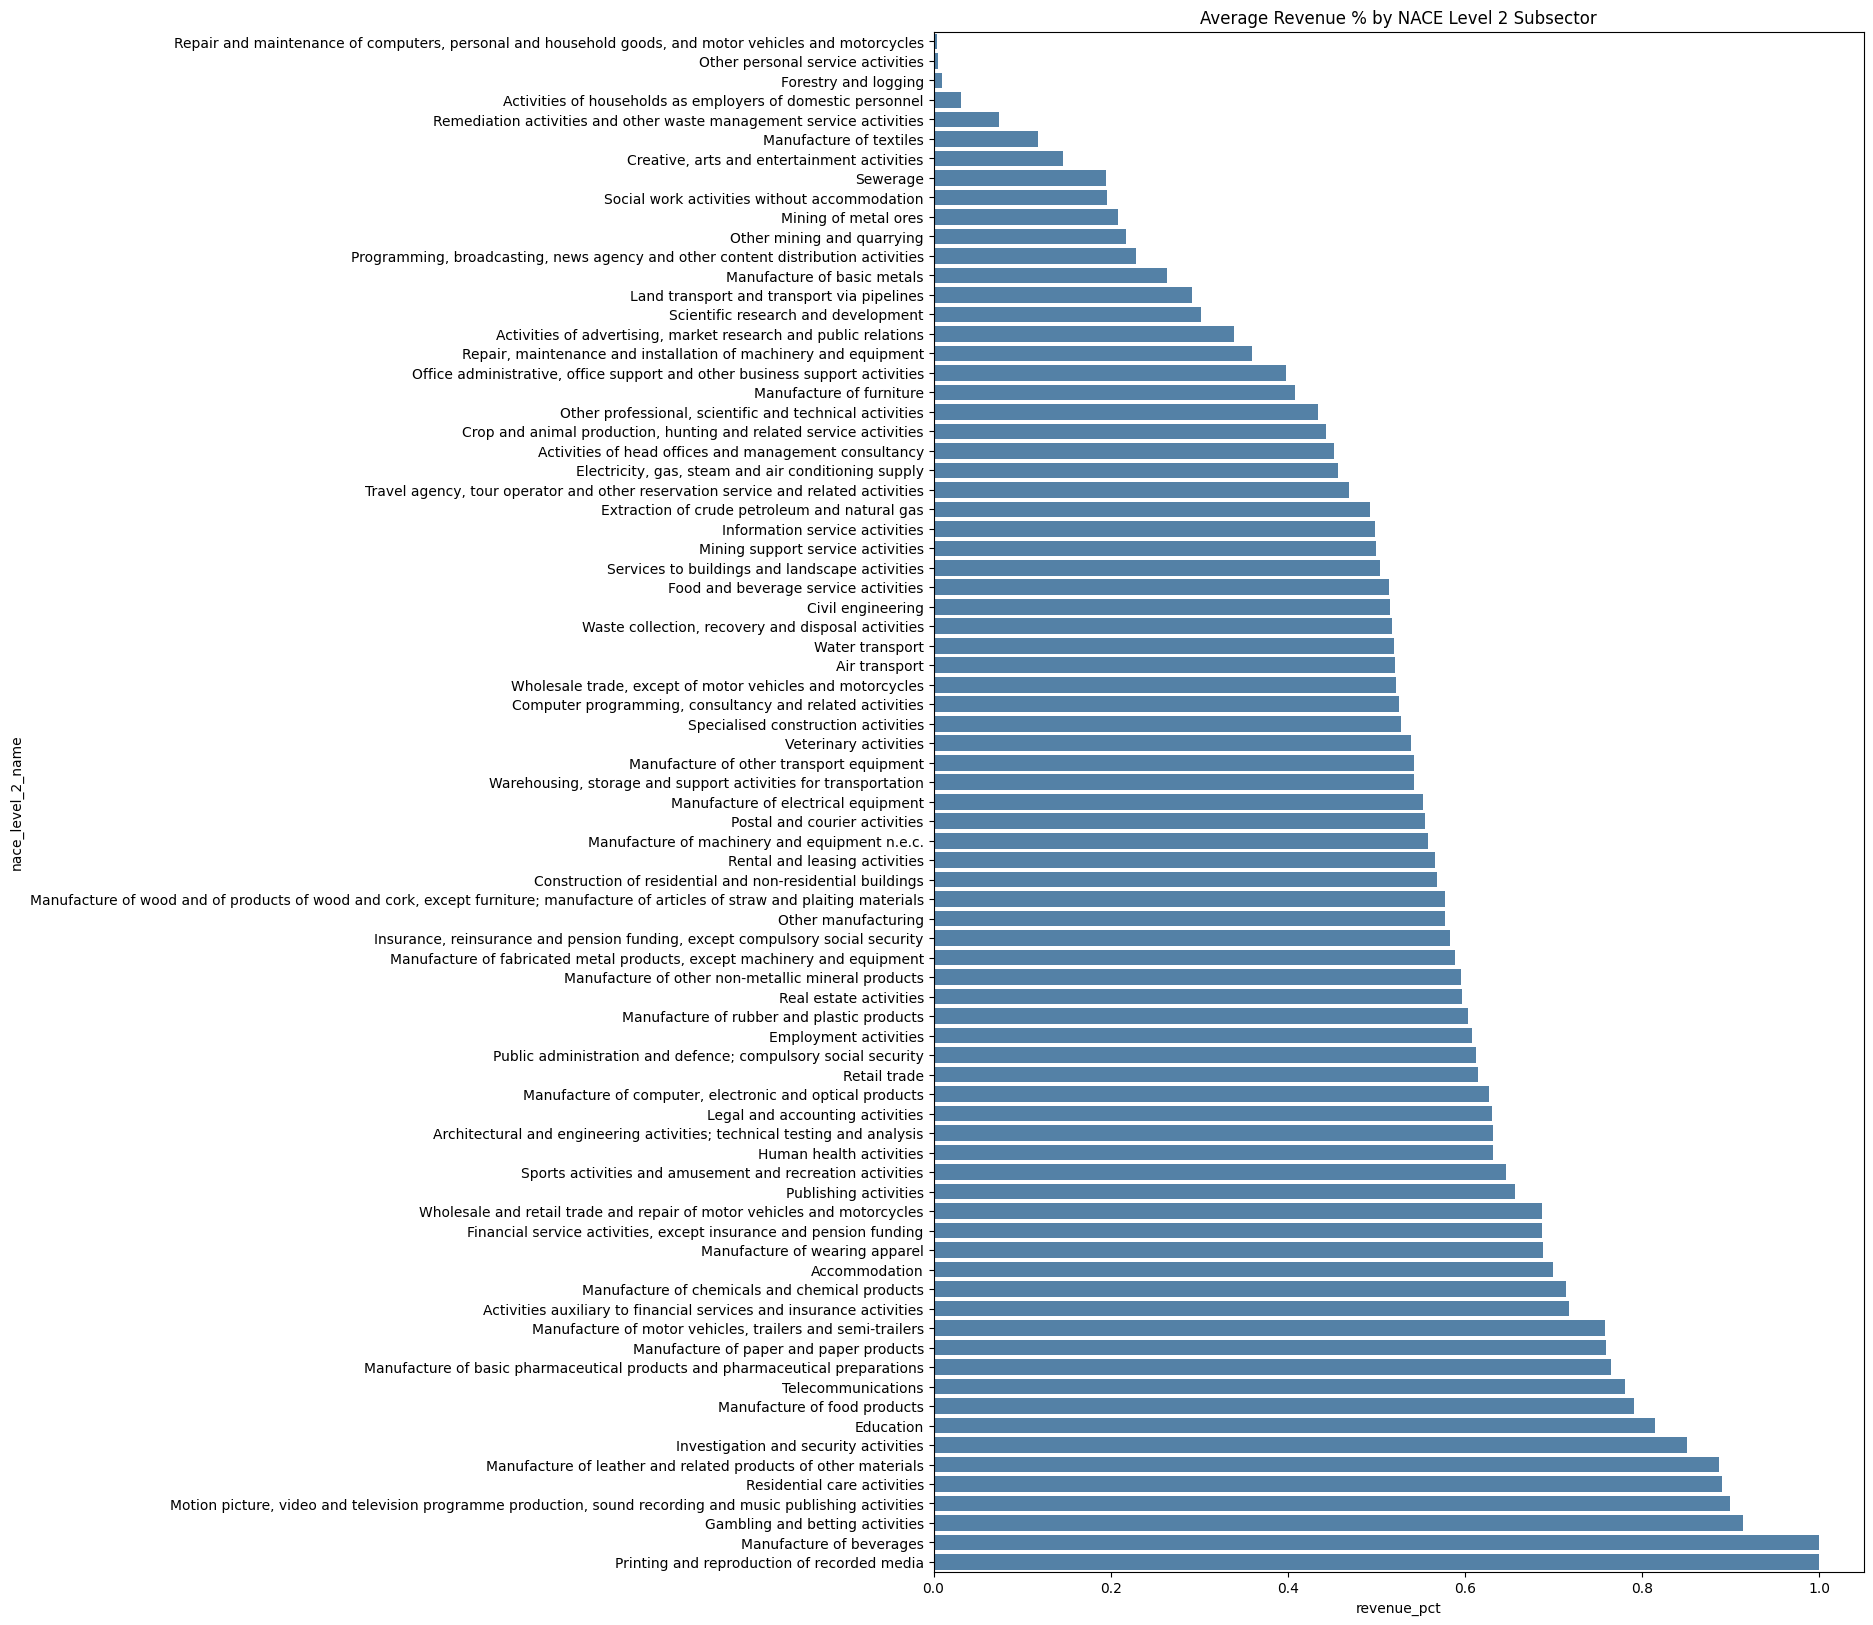

In [99]:
plt.figure(figsize=(12, 20))
sns.barplot(
    data=avg_rev_L2,
    x="revenue_pct",
    y="nace_level_2_name",
    color="steelblue"
)
plt.title("Average Revenue % by NACE Level 2 Subsector")
plt.show()